In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('air_traffic_data.csv')

In [3]:
df.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


In [4]:
df.shape

(15007, 16)

In [5]:
df.drop(['Activity Period','Operating Airline IATA Code','Published Airline IATA Code','Passenger Count','Adjusted Activity Type Code'],axis=1,inplace = True)

In [6]:
df.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Passenger Count,Year,Month
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,July
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,July
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,10830,2005,July
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,July
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,July


In [7]:
df.shape

(15007, 11)

In [8]:
df = df.replace({'United Airlines - Pre 07/01/2013':'United Airlines'},regex=True)

In [9]:
df['Operating Airline'].value_counts()

United Airlines                     3046
SkyWest Airlines                     963
Alaska Airlines                      751
Delta Air Lines                      386
Air Canada                           366
                                    ... 
Evergreen International Airlines       2
Xtra Airways                           2
Atlas Air, Inc                         2
Pacific Aviation                       2
Boeing Company                         1
Name: Operating Airline, Length: 76, dtype: int64

In [10]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print(cat_feature)

['Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Month']


In [11]:
for feature in df.columns:
    print(f'{feature} --> {len(df[feature].unique())}')

Operating Airline --> 76
Published Airline --> 67
GEO Summary --> 2
GEO Region --> 9
Activity Type Code --> 3
Price Category Code --> 2
Terminal --> 5
Boarding Area --> 8
Adjusted Passenger Count --> 11702
Year --> 12
Month --> 12


In [12]:
# for feature in cat_feature:
#     temp = df.groupby(feature)['Adjusted Passenger Count'].count()/len(df)
#     temp_df = temp[temp>0.01].index
#     df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    
for feature in ['Operating Airline','Published Airline']:
    temp = df.groupby(feature)['Adjusted Passenger Count'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [13]:
for feature in df.columns:
    print(f'{feature} --> {len(df[feature].unique())}')

Operating Airline --> 36
Published Airline --> 34
GEO Summary --> 2
GEO Region --> 9
Activity Type Code --> 3
Price Category Code --> 2
Terminal --> 5
Boarding Area --> 8
Adjusted Passenger Count --> 11702
Year --> 12
Month --> 12


In [14]:
df.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Passenger Count,Year,Month
0,Rare_var,Rare_var,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,July
1,Rare_var,Rare_var,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,July
2,Rare_var,Rare_var,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,10830,2005,July
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,July
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,July


In [15]:
df.to_csv('final_df.csv',index= False)

In [16]:
df = pd.get_dummies(df)
df.head()

,Adjusted Passenger Count,Year,Operating Airline_Aeromexico,Operating Airline_Air Canada,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air New Zealand,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_American Airlines,Operating Airline_Asiana Airlines,Operating Airline_British Airways,Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Horizon Air,Operating Airline_Japan Airlines,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_Lufthansa German Airlines,Operating Airline_Northwest Airlines,Operating Airline_Philippine Airlines,Operating Airline_Rare_var,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Sun Country Airlines,Operating Airline_TACA,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Published Airline_Aeromexico,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air New Zealand,Published Airline_AirTran Airways,Published Airline_Alaska Airlines,Published Airline_All Nippon Airways,Published Airline_American Airlines,Published Airline_Asiana Airlines,Published Airline_British Airways,Published Airline_Cathay Pacific,Published Airline_China Airlines,Published Airline_Delta Air Lines,Published Airline_EVA Airways,Published Airline_Emirates,Published Airline_Frontier Airlines,Published Airline_Hawaiian Airlines,Published Airline_Japan Airlines,Published Airline_JetBlue Airways,Published Airline_KLM Royal Dutch Airlines,Published Airline_Korean Air Lines,Published Airline_Lufthansa German Airlines,Published Airline_Northwest Airlines,Published Airline_Philippine Airlines,Published Airline_Rare_var,Published Airline_Singapore Airlines,Published Airline_Southwest Airlines,Published Airline_Sun Country Airlines,Published Airline_TACA,Published Airline_US Airways,Published Airline_United Airlines,Published Airline_Virgin America,Published Airline_Virgin Atlantic,GEO Summary_Domestic,GEO Summary_International,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Low Fare,Price Category Code_Other,Terminal_International,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_A,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,27271,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,29131,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,10830,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,35156,2005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
df.shape

(15007, 113)

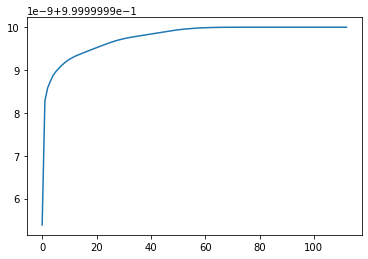

In [18]:
from sklearn.decomposition import PCA
dff = df.copy()
##df_standardize = StandardScaler().fit_transform(dff)
##I didn't standardize it again because the data is already close to the standard.
pca = PCA()
pca_fit = pca.fit_transform(dff)
pca = PCA().fit(dff)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [19]:
pca = PCA(n_components = 40)
pca_fit = pca.fit_transform(dff)
pca_df = pd.DataFrame(data = pca_fit)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-2060.917115,5.438657,-1.624845,-0.588794,0.699289,-0.400539,0.354729,0.668068,0.416829,0.827594,-0.669926,-0.673598,-0.270140,-0.023183,-0.462523,0.712286,-0.100714,0.229297,-0.007292,-0.004726,-0.042955,-0.075967,-0.094761,-0.129757,-0.019561,-0.006793,-0.113275,-0.073489,-0.022690,-0.062172,0.076503,-0.098962,-0.027786,0.028074,0.048530,0.019849,-0.003189,0.000415,-0.000217,-0.002874
1,-200.917115,5.444015,-1.633320,-0.544561,-0.713356,-0.400411,0.374865,0.672970,0.406119,0.822983,-0.660279,-0.670015,-0.277471,-0.051747,-0.461509,0.713376,-0.100974,0.232912,-0.007409,-0.003758,-0.040998,-0.072024,-0.089789,-0.129302,-0.020932,-0.008149,-0.098285,-0.081661,-0.016723,-0.055634,0.069942,-0.105044,-0.036544,0.027545,0.039612,0.015699,-0.002848,0.000294,-0.000206,-0.002795
2,-18501.917115,5.401237,-1.768303,-0.328148,0.004258,-0.352814,0.518079,0.596176,0.399046,0.647685,-0.797351,-0.760554,-0.308226,0.438605,-0.441938,0.733442,-0.108772,0.274224,-0.029206,-0.038471,-0.030670,-0.101901,-0.243482,-0.035401,-0.027789,-0.083898,0.676300,0.319405,0.211663,0.217003,-0.053840,-0.006476,-0.009929,0.003819,-0.139489,0.062496,-0.006069,0.004777,-0.000012,-0.002876
3,5824.082875,5.411344,0.023833,-0.071696,0.673638,0.087963,-1.087924,-0.132983,1.391741,0.477565,0.033947,-0.102270,0.007379,0.075231,-0.411712,0.707014,-0.064237,0.658224,0.036068,0.140627,0.248262,0.749500,0.394149,-0.163885,-0.050653,-0.046749,0.081628,-0.432977,0.421015,0.099322,-0.199659,0.062918,-0.064187,-0.101713,0.116944,0.110863,-0.006868,0.019348,-0.000247,-0.004459
4,4758.082875,5.408319,-0.003367,-0.016740,-0.738367,0.093174,-1.064186,-0.130308,1.376249,0.472588,0.044454,-0.097779,0.003213,0.046112,-0.410645,0.708473,-0.064623,0.661534,0.035763,0.141323,0.249944,0.752127,0.397682,-0.163190,-0.051985,-0.047942,0.093324,-0.440558,0.427485,0.104721,-0.205542,0.057023,-0.071217,-0.102046,0.110057,0.106760,-0.006577,0.019054,-0.000244,-0.004417


In [20]:
X = df.iloc[:,1:]
X.head()

,Year,Operating Airline_Aeromexico,Operating Airline_Air Canada,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air New Zealand,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_American Airlines,Operating Airline_Asiana Airlines,Operating Airline_British Airways,Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Horizon Air,Operating Airline_Japan Airlines,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_Lufthansa German Airlines,Operating Airline_Northwest Airlines,Operating Airline_Philippine Airlines,Operating Airline_Rare_var,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Sun Country Airlines,Operating Airline_TACA,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Published Airline_Aeromexico,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air New Zealand,Published Airline_AirTran Airways,Published Airline_Alaska Airlines,Published Airline_All Nippon Airways,Published Airline_American Airlines,Published Airline_Asiana Airlines,Published Airline_British Airways,Published Airline_Cathay Pacific,Published Airline_China Airlines,Published Airline_Delta Air Lines,Published Airline_EVA Airways,Published Airline_Emirates,Published Airline_Frontier Airlines,Published Airline_Hawaiian Airlines,Published Airline_Japan Airlines,Published Airline_JetBlue Airways,Published Airline_KLM Royal Dutch Airlines,Published Airline_Korean Air Lines,Published Airline_Lufthansa German Airlines,Published Airline_Northwest Airlines,Published Airline_Philippine Airlines,Published Airline_Rare_var,Published Airline_Singapore Airlines,Published Airline_Southwest Airlines,Published Airline_Sun Country Airlines,Published Airline_TACA,Published Airline_US Airways,Published Airline_United Airlines,Published Airline_Virgin America,Published Airline_Virgin Atlantic,GEO Summary_Domestic,GEO Summary_International,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Low Fare,Price Category Code_Other,Terminal_International,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_A,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1

In [21]:
Y = df.iloc[:,0]
Y.head()

0    27271
1    29131
2    10830
3    35156
4    34090
Name: Adjusted Passenger Count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [23]:
y_test.shape

(3752,)

In [24]:
x_train.shape

(11255, 112)

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

pred = rf_model.predict(x_test)

In [26]:
pred

array([ 9691.01038889, 18347.88      , 13848.35      , ...,
        4147.61      , 42499.75      ,  8078.82      ])

In [27]:
y_test

13985      9813
974       16015
5441      14420
4007       5191
11945    103145
          ...  
8074       4674
3248      36784
1208       3019
1564      40734
10339      9471
Name: Adjusted Passenger Count, Length: 3752, dtype: int64

In [28]:
rf_model.score(x_test,y_test)

0.8949637665102593

In [29]:
x_test.head()

,Year,Operating Airline_Aeromexico,Operating Airline_Air Canada,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air New Zealand,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_American Airlines,Operating Airline_Asiana Airlines,Operating Airline_British Airways,Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Horizon Air,Operating Airline_Japan Airlines,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_Lufthansa German Airlines,Operating Airline_Northwest Airlines,Operating Airline_Philippine Airlines,Operating Airline_Rare_var,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Sun Country Airlines,Operating Airline_TACA,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Published Airline_Aeromexico,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air New Zealand,Published Airline_AirTran Airways,Published Airline_Alaska Airlines,Published Airline_All Nippon Airways,Published Airline_American Airlines,Published Airline_Asiana Airlines,Published Airline_British Airways,Published Airline_Cathay Pacific,Published Airline_China Airlines,Published Airline_Delta Air Lines,Published Airline_EVA Airways,Published Airline_Emirates,Published Airline_Frontier Airlines,Published Airline_Hawaiian Airlines,Published Airline_Japan Airlines,Published Airline_JetBlue Airways,Published Airline_KLM Royal Dutch Airlines,Published Airline_Korean Air Lines,Published Airline_Lufthansa German Airlines,Published Airline_Northwest Airlines,Published Airline_Philippine Airlines,Published Airline_Rare_var,Published Airline_Singapore Airlines,Published Airline_Southwest Airlines,Published Airline_Sun Country Airlines,Published Airline_TACA,Published Airline_US Airways,Published Airline_United Airlines,Published Airline_Virgin America,Published Airline_Virgin Atlantic,GEO Summary_Domestic,GEO Summary_International,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Low Fare,Price Category Code_Other,Terminal_International,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_A,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
13985,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
974,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5441,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4007,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0

In [43]:
t = x_test.iloc[1,:]

In [44]:
t = np.array(t).reshape(1,-1)

In [45]:
t

array([[2006,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    1,    0,    0,    0,    1,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
           0,    0]], dtype=int64)

In [46]:
len(t[0])

112

In [47]:
rf_model.predict(t)

array([18347.88])

In [34]:
import pickle
pickle.dump(rf_model,open('model.pkl','wb'))

In [35]:
model = pickle.load(open('model.pkl','rb'))

In [36]:
model.predict(t)

array([9691.01038889])

In [37]:
df.to_csv('model_df.csv',index= False)

In [40]:
X.shape

(15007, 112)

In [42]:
df.columns

Index(['Adjusted Passenger Count', 'Year', 'Operating Airline_Aeromexico',
       'Operating Airline_Air Canada ', 'Operating Airline_Air China',
       'Operating Airline_Air France', 'Operating Airline_Air New Zealand',
       'Operating Airline_AirTran Airways',
       'Operating Airline_Alaska Airlines',
       'Operating Airline_All Nippon Airways',
       ...
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September'],
      dtype='object', length=113)